# A06 - [Project: Bird Species](https://dtkaplan.github.io/DataComputingEbook/project-bird-species.html#project-bird-species)
Kaplan, Daniel & Matthew Beckman. (2021). _Data Computing_. 2nd Ed. [Home](https://dtkaplan.github.io/DataComputingEbook/).

https://davefriedman01.github.io/Mathematics/computer/program/rlang/STAT184/intro.html

---

## Programming Environment

In [1]:
library(dcData)
library(tidyverse)

sessionInfo()

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


R version 4.3.0 (2023-04-21)
Platform: aarch64-apple-darwin20 (64-bit)
Running under: macOS Ventura 13.3.1

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/lib/libRlapack.dylib;  LAPACK version 3.11.0

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

time zone: America/New_York
tzcode source: internal

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] lubridate_1.9.2 forcats_1.0.0   stringr_1.5.0   dplyr_1.1.2    
 [5] purrr_1.0.1     readr_2.1.4     tidyr_1.3.0     tibble_3.2.1   
 [9] ggplot2_3.4.2   tidyverse_2.0.0 dcData_0.1.0   

loaded via a namespace (and not attached):
 [1] gtable_0.3.3     jsonlite_1.8.5   compiler_4.3.0   crayon_1.5.2    
 [5] tidyselect_1.2.0 IRdisplay_1.1    scales_1.2.1     uuid_1.1-0      
 [9] fastmap_1.1.1    IRkern

---

In [10]:
?dcData::OrdwayBirds

OrdwayBirds               package:dcData               R Documentation

_B_i_r_d_s _c_a_p_t_u_r_e_d _a_n_d _r_e_l_e_a_s_e_d _a_t _O_r_d_w_a_y, _c_o_m_p_l_e_t_e _a_n_d _u_n_c_l_e_a_n_e_d

_D_e_s_c_r_i_p_t_i_o_n:

     The historical record of birds captured and released at the
     Katharine Ordway Natural History Study Area, a 278-acre preserve
     in Inver Grove Heights, Minnesota, owned and managed by Macalester
     College.

_U_s_a_g_e:

     data("OrdwayBirds")
     
_F_o_r_m_a_t:

     A data frame with 15,829 observations on the following 26
     variables:

     bogus

     Timestamp indicates when the data were entered into an electronic
          record, not anything about the bird being described

     Year year of capture

     Day day of capture

     Month month of capture

     CaptureTime time of capture

     SpeciesName

     Sex

     Age

     BandNumber

     TrapID

     Weather

     Bandi

In [3]:
?dcData::OrdwaySpeciesNames

OrdwaySpeciesNames           package:dcData            R Documentation

_C_o_r_r_e_c_t_e_d _S_p_e_c_i_e_s _N_a_m_e_s _f_o_r _t_h_e _O_r_d_w_a_y _B_i_r_d_s

_D_e_s_c_r_i_p_t_i_o_n:

     This data frame lists all the species name that appear in
     `OrdwayBirds`. In many cases, the species name was mis-spelled in
     the original. As a result, many birds are listed as separate
     species even though, in reality, they all belong to the same
     species. For each potentially mis-spelled species name, this table
     gives a standardized name.

_U_s_a_g_e:

     data("OrdwaySpeciesNames")
     
_F_o_r_m_a_t:

     A data frame with 265 observations on the following 2 variables:

     SpeciesName The original spelling, or misspelling, of a bird
          species.

     SpeciesNameCleaned Corrected spelling (or NA if the original was
          not identifiable.)

_S_o_u_r_c_e:

     Daniel Kaplan and students in a 2013 Da

In [5]:
OrdwayBirds %>%
  select(Month, Day) %>%
  head()

,Month,Day
,<chr>,<chr>
3,7,16
4,,
5,7,16
6,7,16
7,7,16
8,7,16


In [11]:
OrdwayBirds <-
  OrdwayBirds %>%
  select(SpeciesName, Month, Day) %>%
  mutate(
    Month = as.numeric(as.character(Month)),
    Day   = as.numeric(as.character(Day))
  )
OrdwayBirds %>%
  head()

,SpeciesName,Month,Day
,<chr>,<dbl>,<dbl>
3,Song Sparrow,7,16
4,,NA,NA
5,Song Sparrow,7,16
6,Field Sparrow,7,16
7,Field Sparrow,7,16
8,Song Sparrow,7,16


In [23]:
OrdwaySpeciesNames %>%
  filter(is.na(SpeciesNameCleaned))

SpeciesName,SpeciesNameCleaned
<chr>,<chr>
,NA
-lost-,NA
-missing-,NA
"[Nothing, just dashes]",NA
13:00:00,NA
Bank Swallow,NA
Barn Swallow,NA
Bay-breasted Warbler,NA
Blackpoll Warbler,NA


---

Task 1

[1] Including misspellings, how many different species are there in the `OrdwayBirds` data?

There are 275 unique values of the variable `SpeciesName`. This reduces to 268 after dropping the following invalid values:
* `''`
* `'-lost-'`
* `'-missing-'`
* `'13:00:00'`
* `'[Nothing, just dashes]'`
* `'lost'`
* `'none'`

[2] Consider the `OrdwaySpeciesNames` data frame also found in the `dcData` package as well. How many distinct species are there in the `SpeciesNameCleaned` variable in `OrdwaySpeciesNames`? You will find it helpful to use `n_distinct()` a reduction function, which counts the number of unique values in a variable.

There are 108 unique values of the variable `SpeciesNameCleaned` after accounting for the value `NA`.

In [25]:
OrdwayBirds %>%
  count(SpeciesName)

SpeciesName,n
<chr>,<int>
,4
-lost-,1
-missing-,1
13:00:00,1
Acadian Flycatcher,1
American Gold Finch,50
American Goldfinch,1153
American Golf Finch,1
American Redfinch,1


In [44]:
OrdwayBirds %>%
  select(SpeciesName) %>%
    n_distinct()

[1] 275

In [38]:
OrdwaySpeciesNames %>%
  count(SpeciesNameCleaned)

SpeciesNameCleaned,n
<chr>,<int>
Acadian Flycatcher,1
American Goldfinch,3
American Redfinch,1
American Redstart,1
American Robin,1
Arkansas Kingbird,1
Baltimore Oriole,3
Black and White Warbler,2
Black-billed Cookoo,2


In [45]:
OrdwaySpeciesNames %>%
  select(SpeciesNameCleaned) %>%
    n_distinct()

[1] 109

---

Task 2

Use the `OrdwaySpeciesNames` table to create a new data frame that corrects the misspellings in `SpeciesNames`. This can be done easily using the `inner_join()` data verb. Look at the names of the variables in `OrdwaySpeciesNames` and `OrdwayBirds`.

[1] Which variable(s) was used for matching cases?

The variable `SpeciesName` was used for matching cases.

[2] What were the variable(s) that will be added?

The variables `SpeciesNameCleaned` (renamed to `Species`), `Month`, and `Day` will be added.

In [53]:
Corrected <-
  OrdwayBirds %>%
    inner_join(y = OrdwaySpeciesNames) %>%
    select(Species = SpeciesNameCleaned, Month, Day) %>%
    na.omit()
Corrected %>%
  head()

Joining with `by = join_by(SpeciesName)`


Warning message in inner_join(., y = OrdwaySpeciesNames):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 4 of `x` matches multiple rows in `y`.
ℹ Row 211 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


,Species,Month,Day
,<chr>,<dbl>,<dbl>
1,Song Sparrow,7,16
3,Song Sparrow,7,16
4,Field Sparrow,7,16
5,Field Sparrow,7,16
6,Field Sparrow,7,16
7,Field Sparrow,7,16


---

Task 3

Call the variable that contains the total `count`. Arrange this into descending order from the species with the most birds, and look through the list. (Hint: Remember `n()`. Also, one of the arguments to one of the data verbs will be `desc(count)` to arrange the cases into descending order. Display the top 10 species in terms of the number of bird captures.) Define for yourself a "major species" as a species with more than a particular threshold count. Set your threshold so that there are 5 or 6 species designated as major. Filter to produce a data frame with only the birds that belong to a major species. Save the output in a table called `Majors`. (Hint: Remember that summary functions can be used case-by-case when filtering or mutating a data frame that has been grouped.)

[1] How many bird captures are reported for each of the corrected species?

See below for the result (major species threshold >= 1000).

In [64]:
Corrected %>%
  count(Species) %>%
  arrange(desc(n)) %>%
  head(n = 10)

,Species,n
,<chr>,<int>
1,Slate-colored Junco,2732
2,Tree Swallow,1537
3,Black-capped Chickadee,1327
4,American Goldfinch,1204
5,Field Sparrow,1164
6,Lincoln's Sparrow,790
7,Robin,608
8,Catbird,554
9,Song Sparrow,512


In [68]:
Corrected %>%
  group_by(Species) %>%
  summarize(count = n()) %>%
  arrange(desc(count)) %>%
  head(n = 10)

Species,count
<chr>,<int>
Slate-colored Junco,2732
Tree Swallow,1537
Black-capped Chickadee,1327
American Goldfinch,1204
Field Sparrow,1164
Lincoln's Sparrow,790
Robin,608
Catbird,554
Song Sparrow,512


In [70]:
Majors <-
  Corrected %>%
    group_by(Species) %>%
    summarize(count = n()) %>%
    arrange(desc(count)) %>%
    filter(count >= 1000)
Majors

Species,count
<chr>,<int>
Slate-colored Junco,2732
Tree Swallow,1537
Black-capped Chickadee,1327
American Goldfinch,1204
Field Sparrow,1164


---

Task 4

When you have correctly produced `Majors`, write a command that produces the month-by-month count of each of the major species. Call this table `ByMonth`. Display this month-by-month count with a bar chart arranged in a way that you think tells the story of what time of year the various species appear. You can use `mplot()` to explore different possibilies. (Warning: `mplot()` and similar interactive functions should not appear in your Rmd file, it needs to be used interactively from the console. Use the "Show Expression" button in `mplot()` to create an expression that you can cut and paste into a chunk in your Rmd document, so that the graph gets created when you compile it.) Once you have the graph, use it to answer these questions:

[1] Which species are present year-round?

* American Goldfinch (11-12 mo)
* Black-capped Chickadee (12 mo)

[2] Which species are migratory, that is, primarily present in one or two seasons?

* Field Sparrow (6 mo)
* Slate-colored Junco (8-9 mo)
* Tree Swallow (3-5 mo)

[3] What is the peak month for each major species?

* `10` American Goldfinch
* `11` Black-capped Chickadee
* `05` Field Sparrow
* `10` Slate-colored Junco
* `06` Tree Swallow

[4] Which major species are seen in good numbers for at least 6 months of the year? (Hint: `n_distinct()` and `>= 6`.)

Arguably, the only species that is not seen in good numbers for at least 6 months of the year is the tree swallow.

In [98]:
ByMonth <-
  OrdwayBirds %>%
    group_by(SpeciesName, Month = as.integer(Month)) %>%
    summarize(count = n()) %>%
    filter(SpeciesName %in% Majors$Species)
ByMonth

`summarise()` has grouped output by 'SpeciesName'. You can override using the
`.groups` argument.


SpeciesName,Month,count
<chr>,<int>,<int>
American Goldfinch,1,10
American Goldfinch,2,51
American Goldfinch,3,48
American Goldfinch,4,21
American Goldfinch,5,125
American Goldfinch,6,63
American Goldfinch,7,67
American Goldfinch,8,70
American Goldfinch,9,151


In [126]:
ByMonth %>%
  group_by(SpeciesName) %>%
  summarize(
    MonthsPerYear   = n(),
    SixMonthsOrMore = n_distinct(Month) >= 6
  )

SpeciesName,MonthsPerYear,SixMonthsOrMore
<chr>,<int>,<lgl>
American Goldfinch,12,TRUE
Black-capped Chickadee,12,TRUE
Field Sparrow,8,TRUE
Slate-colored Junco,10,TRUE
Tree Swallow,5,FALSE


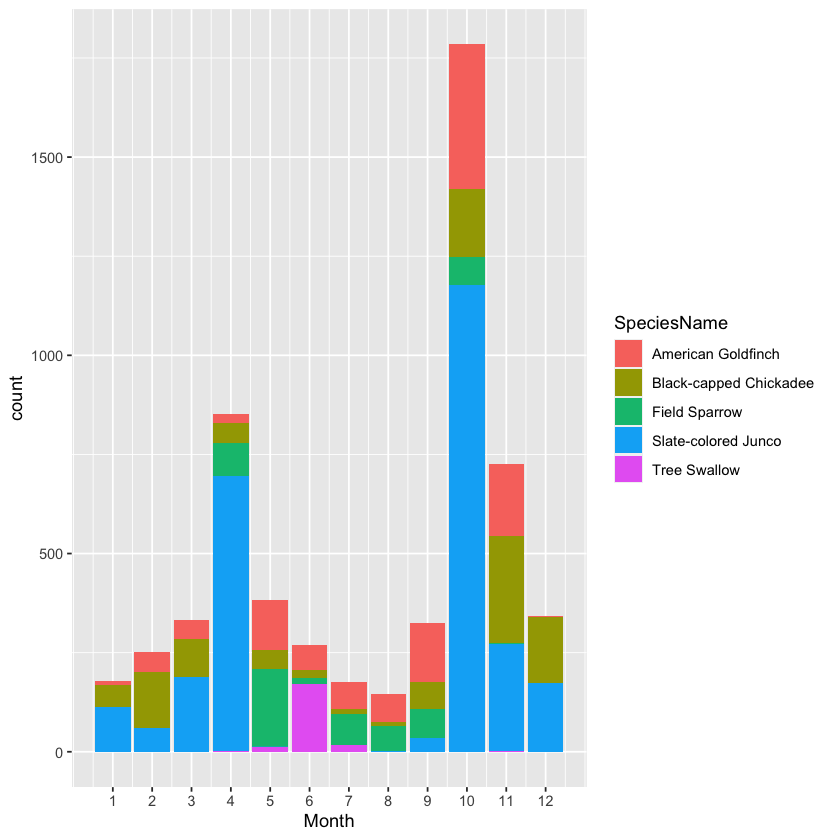

In [102]:
ByMonth %>%
  ggplot() +
    geom_bar(
      mapping     = aes(x = Month, y = count, fill = SpeciesName),
      na.rm       = FALSE,
      position    = 'stack',
      show.legend = TRUE,
      stat        = 'identity'
    ) +
    scale_x_continuous(breaks = 1:12)

---